<a href="https://colab.research.google.com/github/keithferns98/DeepLearning/blob/main/face_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
#import seaborn as sns
import tensorflow as tf
#import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
import pandas as pd
import numpy as np
import os

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d msambare/fer2013

mkdir: cannot create directory ‘/root/.kaggle’: File exists
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fer2013.zip

Archive:  fer2013.zip
replace test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
img=cv2.imread("/content/train/disgust/Training_10371709.jpg")
img.shape

(48, 48, 3)

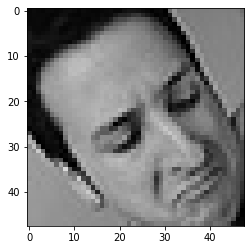

In [ ]:
plt.imshow(img)

In [ ]:
train_dir="train/"
test_dir = 'test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       fear  angry  neutral   sad  surprise  happy  disgust
train  4097   3995     4965  4830      3171   7215      436
      fear  angry  neutral   sad  surprise  happy  disgust
test  1024    958     1233  1247       831   1774      111


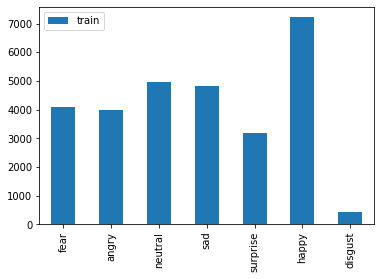

In [ ]:
train_count.transpose().plot(kind='bar')

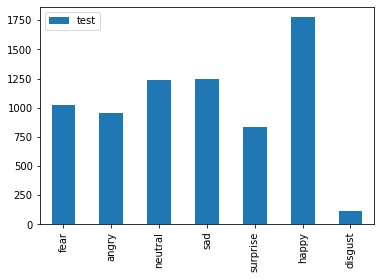

In [ ]:
test_count.transpose().plot(kind="bar")

In [ ]:
classes=["angry", "disgust", "fear", "happy",  "neutral", "sad", "surprise"]

In [ ]:
train_dir="train/"
test_dir = 'test/'
training_data=[]
img_size=224

def create_training_data(Classes):
  for category in Classes:
    path=os.path.join(train_dir,category)
    print(len(path))
    class_num=Classes.index(category)
    print(class_num)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        print(e)


In [ ]:
create_training_data(Classes=classes)

11
0
13
1
10
2
11
3
13
4
9
5
14
6


In [ ]:
print(len(training_data))

28709


In [ ]:
training_data[0]

[array([[[ 94,  94,  94],
         [ 94,  94,  94],
         [ 91,  91,  91],
         ...,
         [251, 251, 251],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 94,  94,  94],
         [ 94,  94,  94],
         [ 91,  91,  91],
         ...,
         [251, 251, 251],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 93,  93,  93],
         [ 93,  93,  93],
         [ 90,  90,  90],
         ...,
         [250, 250, 250],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[254, 254, 254],
         [254, 254, 254],
         [253, 253, 253],
         ...,
         [236, 236, 236],
         [236, 236, 236],
         [236, 236, 236]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [236, 236, 236],
         [236, 236, 236],
         [236, 236, 236]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [253, 253, 253],
         ...,
         [236, 236, 236],
  

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
X=[]
y=[]
for features,labels in training_data:
  X.append(features)
  y.append(labels)

X=np.array(X).reshape(-1,img_size,img_size,3)

In [ ]:
len(y)
type(y[0])

int

In [ ]:
len(y)

28709

In [ ]:
len(X)

28709

In [ ]:
# X = np.array(X,dtype='uint8').reshape(-1, img_size, img_size, 3)
y = np.array(y, dtype='uint8')

In [ ]:
# X= X/255.0;

In [ ]:
for i in range(0,28709):
    X[i] = X[i]/255.0

In [ ]:
model=tf.keras.applications.MobileNetV2()

In [ ]:
X.shape

(28709, 224, 224, 3)

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
base_input=model.layers[0]

In [ ]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
base_output=model.layers[-2].output
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
final_output=Dense(64)(base_output)
final_output=Activation('relu')(final_output)
final_output=Dense(7,activation="softmax")(final_output)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_1')>

In [ ]:
new_model=Model(inputs=model.input,outputs=final_output)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=new_model.fit(X,y,epochs=5,)